# Visualizations for the Dashboard

In [12]:
#import libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [13]:
#Load data
covid = pd.read_csv("covid19.csv")
#del covid['Unnamed:0']
covid.sample(10)
#Why is there an Unnamed column?

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
118409,118409,Jiangxi,China,4/16/21,27.614000,115.722100,937,1,936
73100,73100,Isle of Man,United Kingdom,10/25/20,54.236100,-4.548100,348,24,321
136551,136551,Hong Kong,China,6/24/21,22.300000,114.200000,11905,210,11621
96966,96966,Cook Islands,New Zealand,1/24/21,-21.236700,-159.777700,0,0,0
56954,56954,NaN,Kuwait,8/25/20,29.311660,47.481766,81573,519,73402
68093,68093,NaN,Uganda,10/6/20,1.373333,32.290275,9082,84,5457
135917,135917,NaN,Saudi Arabia,6/21/21,23.885942,45.079162,475403,7691,457128
76654,76654,NaN,Grenada,11/8/20,12.116500,-61.679000,32,0,27
35362,35362,NaN,Greece,6/4/20,39.074200,21.824300,2952,180,1374
67521,67521,NaN,Papua New Guinea,10/4/20,-6.314993,143.955550,540,7,527


## World Map of daily cases

In [14]:
#filter out max date
covid['date'] = pd.to_datetime(covid['date'])
covid_latest = covid[(covid['date'] == covid['date'].max())]
covid_latest.tail()

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
151487,151487,NaN,Zimbabwe,2021-08-19,-19.015438,29.154857,121902,4198,0
152063,152063,NaN,Canada,2021-08-19,56.130400,-106.346800,1470803,26743,0
152581,152581,NaN,China,2021-08-19,1079.625300,3686.421100,106689,4848,0
153157,153157,NaN,United Kingdom,2021-08-19,262.083198,-497.280566,6422515,131691,0
153733,153733,NaN,Australia,2021-08-19,-256.850200,1130.843900,42228,976,0


In [15]:
#Just select countries and not including provinces/states
#This would mean that the Province/State column is NaN
covid_latest = covid_latest.loc[covid_latest['Province/State'].isna()]

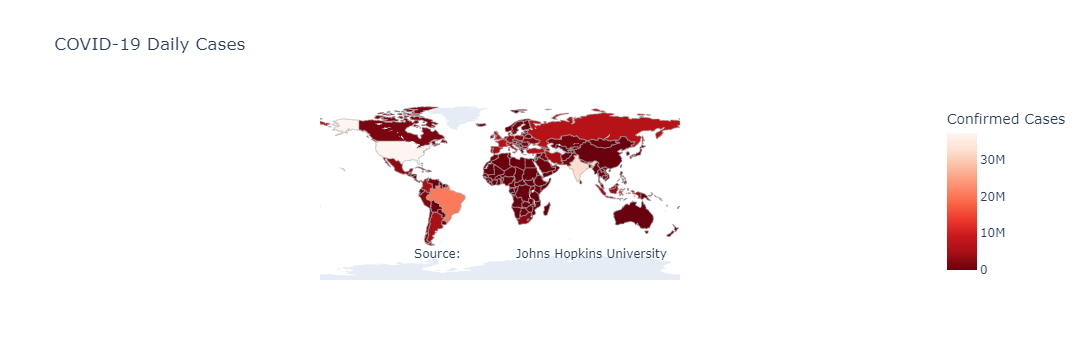

In [16]:
#Map for daily confirmed cases
fig = go.Figure(data=go.Choropleth(
    locations = covid_latest['Country/Region'],
    locationmode = 'country names', #make this reactive to whatever country is selected
    z = covid_latest['confirmed'], #will make this reactive-- input either confirmed, deaths, or recovered
    text =covid_latest['Country/Region'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Confirmed Cases', #make this reactive
))


fig.update_layout(
    title_text='COVID-19 Daily Cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/CSSEGISandData/COVID-19">\
            Johns Hopkins University </a>',
        showarrow = False
    )]
)

fig.show()

## Total Daily Cases

In [29]:
#total cases to date
total_cases_confirmed = covid_latest['confirmed'].sum()
total_cases_deaths = covid_latest['deaths'].sum()
total_cases_recoveries = covid_latest['recoveries'].sum()

# Initializing the Dashboard

In [31]:
#initialize dash app
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
